Kacper Staroń
298842

## PD2 Encoding i imputacja

Oświadczam, że niniejsza praca stanowiąca podstawę do uznania osiągnięcia efektów uczenia się z przedmiotu Wstęp do Uczenia Maszynowego została wykonana przeze mnie samodzielnie.

## Przygotowanie środowiska i danych

In [163]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from category_encoders import TargetEncoder 
from category_encoders import OneHotEncoder 
from category_encoders import OrdinalEncoder 
from category_encoders import LeaveOneOutEncoder 

In [164]:
data = pd.read_csv('https://www.dropbox.com/s/360xhh2d9lnaek3/allegro-api-transactions.csv?dl=1')

In [165]:
data.shape

(420020, 14)

In [166]:
data.head()

,lp,date,item_id,categories,pay_option_on_delivery,pay_option_transfer,seller,price,it_is_allegro_standard,it_quantity,it_is_brand_zone,it_seller_rating,it_location,main_category
0,0,2016-04-03 21:21:08,4753602474,"['Komputery', 'Dyski i napędy', 'Nośniki', 'No...",1,1,radzioch666,59.99,1,997,0,50177,Warszawa,Komputery
1,1,2016-04-03 15:35:26,4773181874,"['Odzież, Obuwie, Dodatki', 'Bielizna damska',...",1,1,InwestycjeNET,4.90,1,9288,0,12428,Warszawa,"Odzież, Obuwie, Dodatki"
2,2,2016-04-03 14:14:31,4781627074,"['Dom i Ogród', 'Budownictwo i Akcesoria', 'Śc...",1,1,otostyl_com,109.90,1,895,0,7389,Leszno,Dom i Ogród
3,3,2016-04-03 19:55:44,4783971474,"['Książki i Komiksy', 'Poradniki i albumy', 'Z...",1,1,Matfel1,18.50,0,971,0,15006,Wola Krzysztoporska,Książki i Komiksy
4,4,2016-04-03 18:05:54,4787908274,"['Odzież, Obuwie, Dodatki', 'Ślub i wesele', '...",1,1,PPHU_RICO,19.90,1,950,0,32975,BIAŁYSTOK,"Odzież, Obuwie, Dodatki"


In [167]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420020 entries, 0 to 420019
Data columns (total 14 columns):
lp                        420020 non-null int64
date                      420020 non-null object
item_id                   420020 non-null int64
categories                420020 non-null object
pay_option_on_delivery    420020 non-null int64
pay_option_transfer       420020 non-null int64
seller                    420020 non-null object
price                     420020 non-null float64
it_is_allegro_standard    420020 non-null int64
it_quantity               420020 non-null int64
it_is_brand_zone          420020 non-null int64
it_seller_rating          420020 non-null int64
it_location               420020 non-null object
main_category             420020 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 44.9+ MB


## Target encoding

In [168]:
encoder = TargetEncoder()

data_tmp = data.copy()
coded = encoder.fit_transform(data['it_location'],data['price'])
data_tmp['target_encoded'] = coded

In [169]:
data_tmp[['it_location','price','target_encoded']]

,it_location,price,target_encoded
0,Warszawa,59.99,85.423398
1,Warszawa,4.90,85.423398
2,Leszno,109.90,61.990914
3,Wola Krzysztoporska,18.50,35.433365
4,BIAŁYSTOK,19.90,117.191956
...,...,...,...
420015,Kraśnik,180.00,24.306929
420016,Dzierżoniów,14.99,66.785334
420017,Supraśl,5.99,18.682800
420018,Poznań,200.00,106.203076


Target encoding polega na zamianie zmiennych kategorycznych średnimi wartościami zmiennej celu dla każdej kategorii. W związku z tym kodowanie odbywa się przy pomocy tylko jednej kolumny, podczas gdy dla One-Hot Encoding zwiększamy rozmiar ramki danych o tyle kolumn, ile jest rónych kategorii, co może być niepraktyczne dla dużych zbiorów danych.

## Encoding zmiennej 'main_category'

### 1. One-Hot Encoding

In [170]:
encoder = OneHotEncoder(cols=['main_category'])

data_tmp = data.drop(['main_category'], axis=1)
coded = encoder.fit_transform(data['main_category'])
data_tmp = pd.concat([data_tmp, coded], axis=1)

In [171]:
data_tmp

,lp,date,item_id,categories,pay_option_on_delivery,pay_option_transfer,seller,price,it_is_allegro_standard,it_quantity,...,main_category_18,main_category_19,main_category_20,main_category_21,main_category_22,main_category_23,main_category_24,main_category_25,main_category_26,main_category_27
0,0,2016-04-03 21:21:08,4753602474,"['Komputery', 'Dyski i napędy', 'Nośniki', 'No...",1,1,radzioch666,59.99,1,997,...,0,0,0,0,0,0,0,0,0,0
1,1,2016-04-03 15:35:26,4773181874,"['Odzież, Obuwie, Dodatki', 'Bielizna damska',...",1,1,InwestycjeNET,4.90,1,9288,...,0,0,0,0,0,0,0,0,0,0
2,2,2016-04-03 14:14:31,4781627074,"['Dom i Ogród', 'Budownictwo i Akcesoria', 'Śc...",1,1,otostyl_com,109.90,1,895,...,0,0,0,0,0,0,0,0,0,0
3,3,2016-04-03 19:55:44,4783971474,"['Książki i Komiksy', 'Poradniki i albumy', 'Z...",1,1,Matfel1,18.50,0,971,...,0,0,0,0,0,0,0,0,0,0
4,4,2016-04-03 18:05:54,4787908274,"['Odzież, Obuwie, Dodatki', 'Ślub i wesele', '...",1,1,PPHU_RICO,19.90,1,950,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420015,420015,2016-04-03 20:27:13,6099625607,"['RTV i AGD', 'Sprzęt audio dla domu', 'Odtwar...",0,0,iwona7012,180.00,0,0,...,0,0,0,0,0,0,0,0,0,0
420016,420016,2016-04-03 22:35:02,6099634607,"['Uroda', 'Makijaż', 'Oczy', 'Tusze do rzęs']",1,1,Dolce_Cosmetics,14.99,1,2,...,0,0,0,0,0,0,0,0,0,0
420017,420017,2016-04-03 22:38:57,6099780407,"['Odzież, Obuwie, Dodatki', 'Przebrania, kosti...",1,1,pewex4all,5.99,1,470,...,0,0,0,0,0,0,0,0,0,0
420018,420018,2016-04-03 22:44:17,6099801007,"['Dla Dzieci', 'Rowery i pojazdy', 'Rowery bie...",1,0,kostasia,200.00,0,0,...,0,0,0,0,0,0,0,0,0,0


### 2. Leave One Out Encoding

In [172]:
encoder = LeaveOneOutEncoder(cols=['main_category'])

data_tmp = data.copy()
coded = encoder.fit_transform(data['main_category'], data['price'])
#data_tmp = pd.concat([data_tmp, coded], axis=1)
data_tmp['target_encoded'] = coded

In [173]:
data_tmp[['main_category','price','target_encoded']]

,main_category,price,target_encoded
0,Komputery,59.99,121.814331
1,"Odzież, Obuwie, Dodatki",4.90,75.859357
2,Dom i Ogród,109.90,72.434342
3,Książki i Komiksy,18.50,25.028061
4,"Odzież, Obuwie, Dodatki",19.90,75.859080
...,...,...,...
420015,RTV i AGD,180.00,107.530709
420016,Uroda,14.99,28.129044
420017,"Odzież, Obuwie, Dodatki",5.99,75.859337
420018,Dla Dzieci,200.00,71.203327


Leave One Out Encoding działa analogicznie do Target Encodingu, z tym że podczas obliczania wartości średniej kolumny celu dla danej kategorii opuszcza wartość z analizowanego w danej chwili wiersza.

### 3. Ordinal Encoding

In [174]:
encoder = OrdinalEncoder(cols=['main_category'])

data_tmp = data.drop(['main_category'], axis=1)
coded = encoder.fit_transform(data['main_category'])
data_tmp = pd.concat([data_tmp, coded], axis=1)

In [175]:
data_tmp

,lp,date,item_id,categories,pay_option_on_delivery,pay_option_transfer,seller,price,it_is_allegro_standard,it_quantity,it_is_brand_zone,it_seller_rating,it_location,main_category
0,0,2016-04-03 21:21:08,4753602474,"['Komputery', 'Dyski i napędy', 'Nośniki', 'No...",1,1,radzioch666,59.99,1,997,0,50177,Warszawa,1
1,1,2016-04-03 15:35:26,4773181874,"['Odzież, Obuwie, Dodatki', 'Bielizna damska',...",1,1,InwestycjeNET,4.90,1,9288,0,12428,Warszawa,2
2,2,2016-04-03 14:14:31,4781627074,"['Dom i Ogród', 'Budownictwo i Akcesoria', 'Śc...",1,1,otostyl_com,109.90,1,895,0,7389,Leszno,3
3,3,2016-04-03 19:55:44,4783971474,"['Książki i Komiksy', 'Poradniki i albumy', 'Z...",1,1,Matfel1,18.50,0,971,0,15006,Wola Krzysztoporska,4
4,4,2016-04-03 18:05:54,4787908274,"['Odzież, Obuwie, Dodatki', 'Ślub i wesele', '...",1,1,PPHU_RICO,19.90,1,950,0,32975,BIAŁYSTOK,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420015,420015,2016-04-03 20:27:13,6099625607,"['RTV i AGD', 'Sprzęt audio dla domu', 'Odtwar...",0,0,iwona7012,180.00,0,0,0,176,Kraśnik,6
420016,420016,2016-04-03 22:35:02,6099634607,"['Uroda', 'Makijaż', 'Oczy', 'Tusze do rzęs']",1,1,Dolce_Cosmetics,14.99,1,2,0,34851,Dzierżoniów,9
420017,420017,2016-04-03 22:38:57,6099780407,"['Odzież, Obuwie, Dodatki', 'Przebrania, kosti...",1,1,pewex4all,5.99,1,470,0,983,Supraśl,2
420018,420018,2016-04-03 22:44:17,6099801007,"['Dla Dzieci', 'Rowery i pojazdy', 'Rowery bie...",1,0,kostasia,200.00,0,0,0,163,Poznań,8


Ordinal Encoding nadaje kolejnym wartościom kategorycznym kolejne liczby naturalne. Stosowany, gdy zmienne kategoryczne są posortowane w konkretny sposób i zależy nam na zakodowaniu informacji o tym porządku (czyli raczej nie w tej sytuacji).

## Imputacja (Multivariate feature imputation)

### Przygotowanie środowiska i danych do drugiej części zadania

Wybieramy do tego zadania tylko drobny podzbiór danych.

In [176]:
data2 = data[['price', 'it_seller_rating', 'it_quantity']].head(40000)

In [177]:
from sklearn.metrics import mean_squared_error
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import math

### Imputowanie it_seller_rating

In [178]:
imputer = IterativeImputer(max_iter=10)
rmse = []

for i in range (10):
    data3 = data2.copy()
    del_random = np.random.randint(0, len(data2), len(data2)//10)
    data3.it_seller_rating[del_random] = math.nan
    
    imp = pd.DataFrame(imputer.fit_transform(data3), columns = ['price', 'it_seller_rating', 'it_quantity'])
    err = math.sqrt(mean_squared_error(imp, data2))
    rmse.append(err)

<ipython-input-178-da5bd20ad78d>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data3.it_seller_rating[del_random] = math.nan
<ipython-input-178-da5bd20ad78d>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data3.it_seller_rating[del_random] = math.nan
<ipython-input-178-da5bd20ad78d>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data3.it_seller_rating[del_random] = math.nan
<ipython-input-178-da5bd20ad78d>:7: SettingWithCopyWarning

In [179]:
rmse

[6346.90858544201,
 6591.043440081499,
 6623.809342397847,
 6638.199835458509,
 6747.9894321632555,
 6453.780510805351,
 7140.211568689911,
 6478.781129496874,
 6549.07386247206,
 6812.8343340033625]

In [180]:
np.std(rmse)

211.94724772952287

In [181]:
np.mean(rmse)

6638.263204101068

### Imputowanie it_seller_rating i it_quantity

In [182]:
imputer = IterativeImputer(max_iter=10)
rmse2 = []

for i in range (10):
    data3 = data2.copy()
    del_random = np.random.randint(0, len(data2), int(len(data2)/10))
    del_random2 = np.random.randint(0, len(data2), int(len(data2)/10))
    data3.it_seller_rating[del_random] = math.nan
    data3.it_quantity[del_random] = math.nan
    
    imp = pd.DataFrame(imputer.fit_transform(data3), columns = ['price', 'it_seller_rating', 'it_quantity'])
    err = math.sqrt(mean_squared_error(imp, data2))
    rmse2.append(err)

<ipython-input-182-b920db7ffc10>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data3.it_seller_rating[del_random] = math.nan
<ipython-input-182-b920db7ffc10>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data3.it_quantity[del_random] = math.nan
<ipython-input-182-b920db7ffc10>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data3.it_seller_rating[del_random] = math.nan
<ipython-input-182-b920db7ffc10>:9: SettingWithCopyWarning: 
A 

In [183]:
rmse2

[7680.811364953148,
 7606.019314258842,
 7880.45984081071,
 7976.130852641858,
 7641.460167764741,
 7692.559448229996,
 8008.368770615589,
 8070.667478173356,
 7844.379853487992,
 8079.965956327852]

In [184]:
np.std(rmse2)

173.18155418494487

In [185]:
np.mean(rmse2)

7848.082304726408

### Podsumowanie

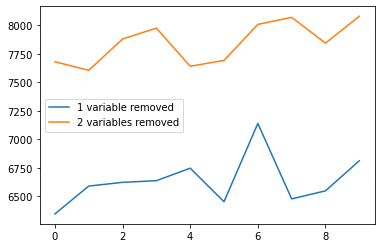

In [186]:
plt.plot(rmse, label = '1 variable removed')
plt.plot(rmse2, label = '2 variables removed')
plt.legend()

Przeprowadzono 10 prób imputacji 10% losowo usuniętych wartości najpierw tylko z kolumny 'it_seller_rating', a potem kolumn 'it_seller_rating' i 'it_quantity' z testowego podzbioru zadanego zbioru (ok. 10% rekordów).

W obu przypadkach do oceny jakości imputacji zastosowano metrykę RMSE. Średnia wartość błędu średniokwadratowego oscylowała dla obu przypadków odpowiednio wokół wartości 6450 i 7700, z relatywnie niskim odchyleniem standardowym. Nie dziwi, że wartości błędu były wyższe dla przypadku, w którym usunięte zostało więcej danych - naturalnie jakość imputacji spada wraz z malejącym rozmiarem zbioru znanych wartości.

W powyższym zadaniu jako algorytm imputacyjny zastosowano Multivariate Feature Imputation.